In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
%matplotlib inline

In [2]:
n_genotypes = 3
n_measurements = 10  # it is trivial to make 10 measurements on the plate reader

# Plate 1 data
plate1_control = np.random.normal(10, 1, size=(n_measurements, 1))
plate1_empty = np.random.normal(1, 1, size=(n_measurements, 1))
plate1_sample_mus = np.random.uniform(low=0.1, high=200, size=n_genotypes)
plate1_sample_sds = np.random.exponential(scale=5, size=n_genotypes)
plate1_sample_data = np.random.normal(loc=plate1_sample_mus, scale=plate1_sample_sds, size=(n_measurements, n_genotypes))

# Plate2 data
plate2_control = np.random.normal(13, 1, size=(n_measurements, 1))
plate2_empty = np.random.normal(3, 1, size=(n_measurements, 1))
plate2_sample_mus = plate1_sample_mus + 3  # plate2 is a systematic shift from plate 1
plate2_sample_sds = plate1_sample_sds      # but has the same variance
plate2_sample_data = np.random.normal(loc=plate2_sample_mus, scale=plate2_sample_sds, size=(3, n_genotypes))

# Plate 3 data
plate3_control = np.random.normal(13, 2, size=(n_measurements, 1))
plate3_empty = np.random.normal(3, 2, size=(n_measurements, 1))
plate3_sample_mus = plate1_sample_mus + 3                            # plate2 is a systematic shift from plate 1
plate3_sample_sds = np.random.exponential(scale=3, size=n_genotypes) # and has greater potential variance
plate3_sample_data = np.random.normal(loc=plate3_sample_mus, scale=plate3_sample_sds, size=(3, n_genotypes))

In [3]:
with pm.Model() as model:
    p1_empt_mu = pm.Flat('plate1 empty mean')
    p1_empt_sd = pm.Exponential('plate1 empty stds', lam=1)
    p1_empt_like = pm.Normal('plate1 empty', mu=p1_empt_mu, sd=p1_empt_sd, observed=plate1_empty)
    p1_ctrl_mu = pm.Flat('plate1 control mean')
    p1_ctrl_sd = pm.Exponential('plate1 control stds', lam=1)
    p1_ctrl_like = pm.Normal('plate1 control', mu=p1_ctrl_mu, sd=p1_ctrl_sd, observed=plate1_control)
    p1_smpl_mu = pm.Flat('plate1 sample mean', shape=n_genotypes)
    p1_smpl_sd = pm.Exponential('plate1 sample stds', lam=1, shape=n_genotypes)
    p1_smpl_like = pm.Normal('plate1 sample', mu=p1_smpl_mu, sd=p1_smpl_sd, observed=plate1_sample_data, shape=n_genotypes)
    p1_ctrl_norm = pm.Deterministic('plate1 control normalized', p1_ctrl_mu - p1_empt_mu)
    p1_samp_norm = pm.Deterministic('plate1 sample normalized', p1_smpl_mu - p1_empt_mu)
    p1_fold = pm.Deterministic('plate1 fold', p1_samp_norm / p1_ctrl_norm)
    
    p2_empt_mu = pm.Flat('plate2 empty mean')
    p2_empt_sd = pm.Exponential('plate2 empty stds', lam=1)
    p2_empt_like = pm.Normal('plate2 empty', mu=p2_empt_mu, sd=p2_empt_sd, observed=plate2_empty)
    p2_ctrl_mu = pm.Flat('plate2 control mean')
    p2_ctrl_sd = pm.Exponential('plate2 control stds', lam=1)
    p2_smpl_mu = pm.Flat('plate2 sample mean', shape=n_genotypes)
    p2_smpl_sd = pm.Exponential('plate2 sample stds', lam=1, shape=n_genotypes)
    p2_ctrl_like = pm.Normal('plate2 control', mu=p2_ctrl_mu, sd=p2_ctrl_sd, observed=plate2_control)
    p2_smpl_like = pm.Normal('plate2 sample', mu=p2_smpl_mu, sd=p2_smpl_sd, observed=plate2_sample_data, shape=n_genotypes)    
    p2_ctrl_norm = pm.Deterministic('plate2 control normalized', p2_ctrl_mu - p2_empt_mu)
    p2_samp_norm = pm.Deterministic('plate2 sample normalized', p2_smpl_mu - p2_empt_mu)
    p2_fold = pm.Deterministic('plate2 fold', p2_samp_norm / p2_ctrl_norm)
        
    p3_empt_mu = pm.Flat('plate3 empty mean')
    p3_empt_sd = pm.Exponential('plate3 empty stds', lam=1)
    p3_empt_like = pm.Normal('plate3 empty', mu=p3_empt_mu, sd=p3_empt_sd, observed=plate3_empty)
    p3_ctrl_mu = pm.Flat('plate3 control mean')
    p3_ctrl_sd = pm.Exponential('plate3 control stds', lam=1)
    p3_smpl_mu = pm.Flat('plate3 sample mean', shape=n_genotypes)
    p3_smpl_sd = pm.Exponential('plate3 sample stds', lam=1, shape=n_genotypes)
    p3_ctrl_like = pm.Normal('plate3 control', mu=p3_ctrl_mu, sd=p3_ctrl_sd, observed=plate3_control)
    p3_smpl_like = pm.Normal('plate3 sample', mu=p3_smpl_mu, sd=p3_smpl_sd, observed=plate3_sample_data, shape=n_genotypes)    
    p3_ctrl_norm = pm.Deterministic('plate3 control normalized', p3_ctrl_mu - p3_empt_mu)
    p3_samp_norm = pm.Deterministic('plate3 sample normalized', p3_smpl_mu - p3_empt_mu)
    p3_fold = pm.Deterministic('plate3 fold', p3_samp_norm / p3_ctrl_norm)
    
    
    average_fold = pm.Deterministic('average fold', (p1_fold + p2_fold + p3_fold) / 3)

Applied log-transform to plate1 empty stds and added transformed plate1 empty stds_log_ to model.
Applied log-transform to plate1 control stds and added transformed plate1 control stds_log_ to model.
Applied log-transform to plate1 sample stds and added transformed plate1 sample stds_log_ to model.
Applied log-transform to plate2 empty stds and added transformed plate2 empty stds_log_ to model.
Applied log-transform to plate2 control stds and added transformed plate2 control stds_log_ to model.
Applied log-transform to plate2 sample stds and added transformed plate2 sample stds_log_ to model.
Applied log-transform to plate3 empty stds and added transformed plate3 empty stds_log_ to model.
Applied log-transform to plate3 control stds and added transformed plate3 control stds_log_ to model.
Applied log-transform to plate3 sample stds and added transformed plate3 sample stds_log_ to model.


In [4]:
%%time
with model:
    params = pm.variational.advi(n=1000000)
    trace = pm.variational.sample_vp(params, draws=2000)

Iteration 0 [0%]: ELBO = -7795482.03
Iteration 100000 [10%]: Average ELBO = -79176.25
Iteration 200000 [20%]: Average ELBO = -616.64
Iteration 300000 [30%]: Average ELBO = -495.09
Iteration 400000 [40%]: Average ELBO = -416.33
Iteration 500000 [50%]: Average ELBO = -379.16
Iteration 600000 [60%]: Average ELBO = -335.31
Iteration 700000 [70%]: Average ELBO = -282.89
Iteration 800000 [80%]: Average ELBO = -260.49
Iteration 900000 [90%]: Average ELBO = -260.39
Finished [100%]: Average ELBO = -260.39
CPU times: user 7min 38s, sys: 6.66 s, total: 7min 45s
Wall time: 11min 10s


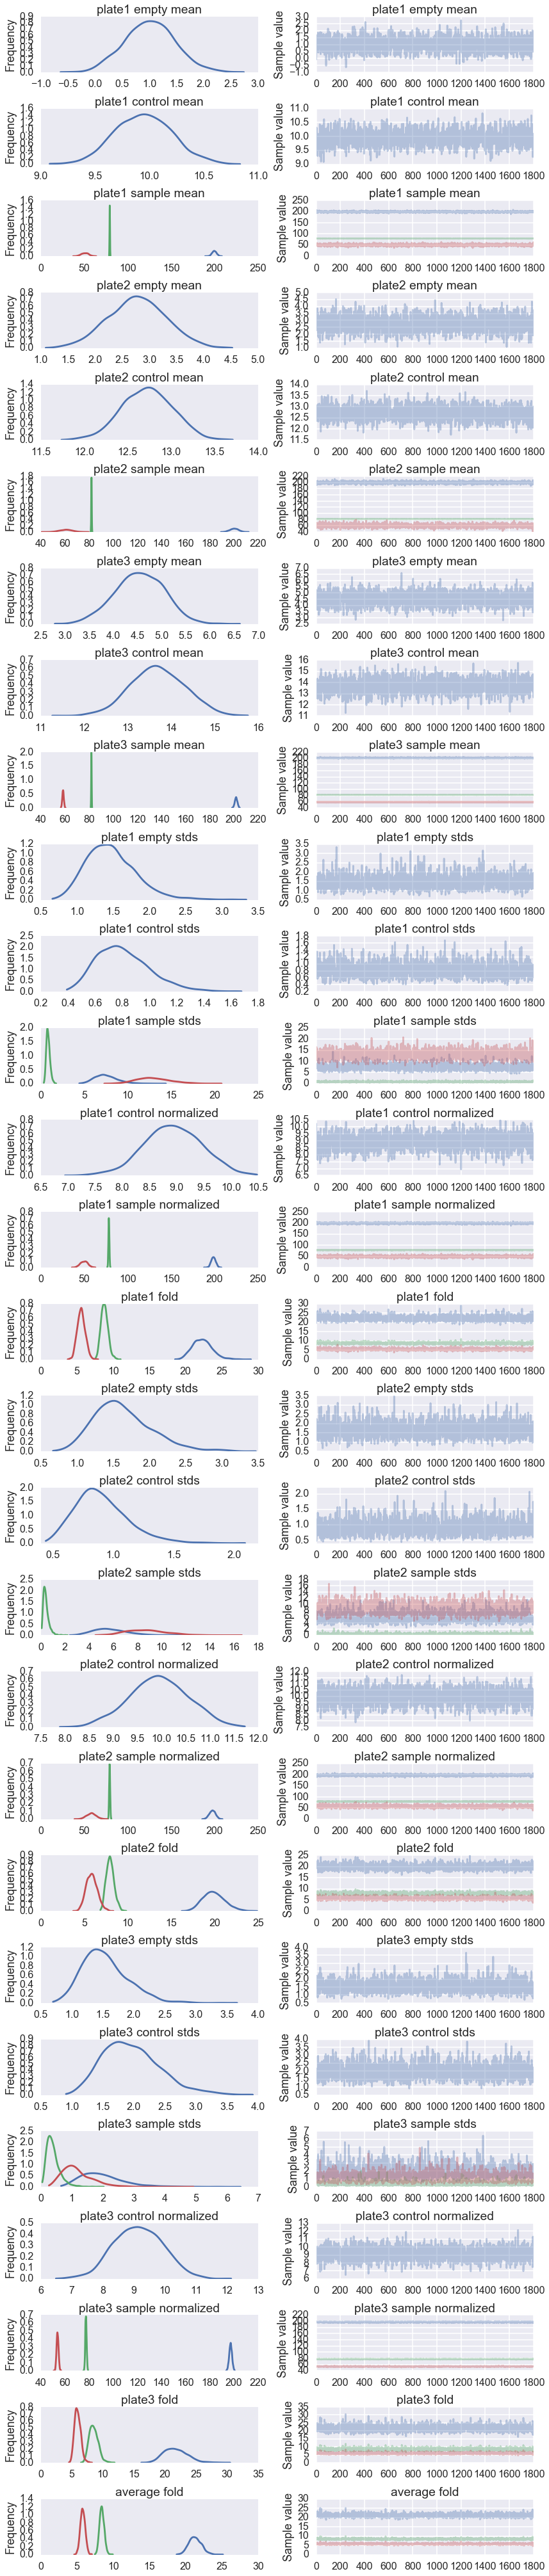

In [5]:
pm.traceplot(trace[200:])# , varnames=['average fold'])
plt.show()